![aaron judge](judge_wide.jpg)

This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit one of the hardest home runs ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition.

In this project, you're going to wrangle, analyze, and visualize Statcast historical data to compare Mr. Judge and another (extremely large) teammate of his, Giancaro Stanton. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. Let's find out how they compare!

**The Data**

There are two CSV files, `judge.csv` and `stanton.csv`, both of which contain Statcast data for 2015-2017. Each row represents one pitch thrown to a batter. 

**Custom Functions**

Two functions have also been provided for you to visualize home rome zones
- `assign_x_coord`: Assigns an x-coordinate to Statcast's strike zone numbers.
- `assign_y_coord`: Assigns a y-coordinate to Statcast's strike zone numbers.

![](zone.png)

In [124]:
# Run this cell to begin
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv')

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv')

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
judge.tail()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


In [125]:
# Start coding here. Use as many cells as you like!
#defining judge_events_2017
judge_events_2017 = judge[judge['game_year']==2017]['events'].value_counts()

#defining stanton_events_2017
stanton_events_2017 = stanton[stanton['game_year']==2017]['events'].value_counts()


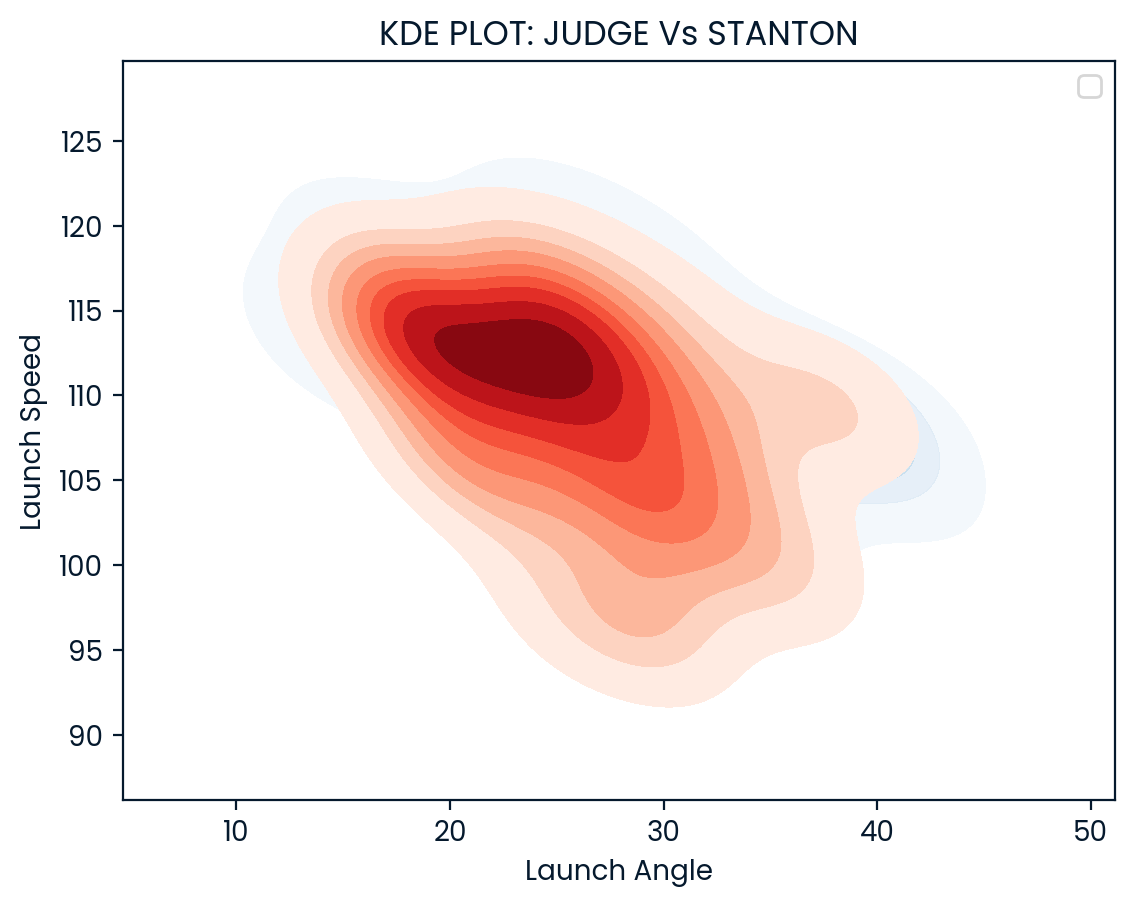

In [126]:
#Which player hit home runs slightly lower and harder?
#For Judge
judge_filtered_2017 = judge[(judge['events'] == 'home_run') & (judge['game_year']==2017)]

stanton_filtered_2017 = stanton[(stanton['game_year'] == 2017) & (stanton['events'] == 'home_run')]

fig1,ax1 = plt.subplots()
sns.kdeplot(
    data = judge_filtered_2017,
    x = 'launch_angle',
    y = 'launch_speed',
    fill = True,
    cmap = 'Blues',
    alpha = 0.5,
    ax = ax1,
    label = "JUDGE"
)

sns.kdeplot(
    data = stanton_filtered_2017,
    x = 'launch_angle',
    y = 'launch_speed',
    fill = True,
    cmap = "Reds",
    alpha = 1,
    ax = ax1,
    label = "STANTON"
)
ax1.set_title("KDE PLOT: JUDGE Vs STANTON")
ax1.set_xlabel('Launch Angle'),
ax1.set_ylabel('Launch Speed'),
ax1.legend()

plt.show()

In [127]:
#Which player hit home runs slightly lower and harder?
player_hr ="Stanton"

In [128]:
#Which player hit their home runs off of faster pitches (has the highest median)?
judge_home_run = judge[judge['events'] == 'home_run']
stanton_home_run = stanton[stanton['events'] == 'home_run']
df_all = pd.concat([judge_home_run, stanton_home_run], ignore_index = True)
df_all

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
0,FT,2017-09-30,93.1,-1.4675,5.3552,Aaron Judge,592450,573186,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (52) on a fly ball to left ...,R,R,R,NYY,TOR,X,NaN,fly_ball,2,0,2017,-1.427900,0.326100,-0.4320,2.9955,NaN,NaN,NaN,0,4,Bot,56.86,4.52,NaN,NaN,431145.0,NaN,170930_180303,5.7047,-135.4206,-1.0399,-18.6301,26.9148,-28.1807,3.8271,1.6673,484.0,118.3,25.740,92.992,2312.0,6.040,492513,573186.0,431145.0,475253.0,446381.0,518626.0,572365.0,485567.0,606192.0,430832.0,54.4579,0.983,1.951,2.0,1.0,0.0,3.0,6.0,23,3
1,FF,2017-09-28,91.4,-1.2834,6.5190,Aaron Judge,592450,607188,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Aaron Judge homers (51) on a fly ball to right...,R,R,R,NYY,TB,X,NaN,fly_ball,2,2,2017,-0.464200,1.650000,-0.0851,2.6020,NaN,NaN,NaN,0,1,Bot,223.58,82.88,NaN,NaN,467092.0,NaN,170928_232325,3.9497,-132.6375,-7.3630,-6.2249,28.1393,-11.7031,3.8278,1.6679,357.0,104.1,41.131,90.457,2220.0,5.838,492483,607188.0,467092.0,446263.0,621002.0,446334.0,588751.0,527049.0,488721.0,605480.0,54.6596,0.337,0.640,2.0,1.0,0.0,3.0,5.0,7,5
2,CH,2017-09-25,84.3,-2.1259,6.1178,Aaron Judge,592450,502239,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,7.0,Aaron Judge homers (50) on a fly ball to left ...,R,R,R,NYY,KC,X,NaN,fly_ball,2,1,2017,-1.167700,0.319700,-0.4138,2.3448,NaN,NaN,NaN,2,7,Bot,57.47,39.95,NaN,NaN,521692.0,NaN,170925_192018,6.3096,-122.6568,-3.1191,-13.0269,21.2326,-28.5495,3.8282,1.6684,408.0,109.6,34.853,84.965,1328.0,6.443,490806,502239.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.0549,0.928,1.840,2.0,1.0,0.0,3.0,6.0,57,4
3,FF,2017-09-25,93.0,-2.5921,5.8090,Aaron Judge,592450,596001,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,2.0,Aaron Judge homers (49) on a fly ball to right...,R,R,R,NYY,KC,X,NaN,fly_ball,3,2,2017,-0.807300,1.738900,-0.0837,3.4372,NaN,NaN,458731.0,1,3,Bot,205.50,42.47,NaN,NaN,521692.0,NaN,170925_175250,8.0487,-134.8087,-3.9271,-11.4310,29.8617,-10.7700,3.8273,1.6674,389.0,107.3,31.263,91.784,2117.0,5.805,490806,596001.0,521692.0,543333.0,593160.0,519058.0,444876.0,466320.0,449181.0,593528.0,54.6921,0.935,1.855,2.0,1.0,0.0,3.0,6.0,20,6
4,SI,2017-09-24,96.5,-2.2724,6.0514,Aaron Judge,592450,572193,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,11.0,Aaron Judge homers (48) on a fly ball to left ...,R,R,R,TOR,NYY,X,NaN,fly_ball,0,0,2017,-1.213200,1.376100,-0.8306,3.2717,NaN,NaN,452104.0,1,7,Top,66.52,44.37,NaN,NaN,431145.0,NaN,170924_194510,6.5044,-140.0805,-4.8844,-17.2693,30.0049,-13.3370,3.8166,1.6557,391.0,98.9,29.746,96.090,2075.0,6.069,492427,572193.0,431145.0,475253.0,446381.0,518626.0,572365.0,606192.0,607680.0,430832.0,54.4331,0.513,0.938,2.0,1.0,0.0,3.0,6.0,63,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,SL,2015-04-25,81.1,-2.0034,5.6356,Giancarlo Stanton,519317,514669,home_run,hit_into_play_score,NaN,NaN,Na

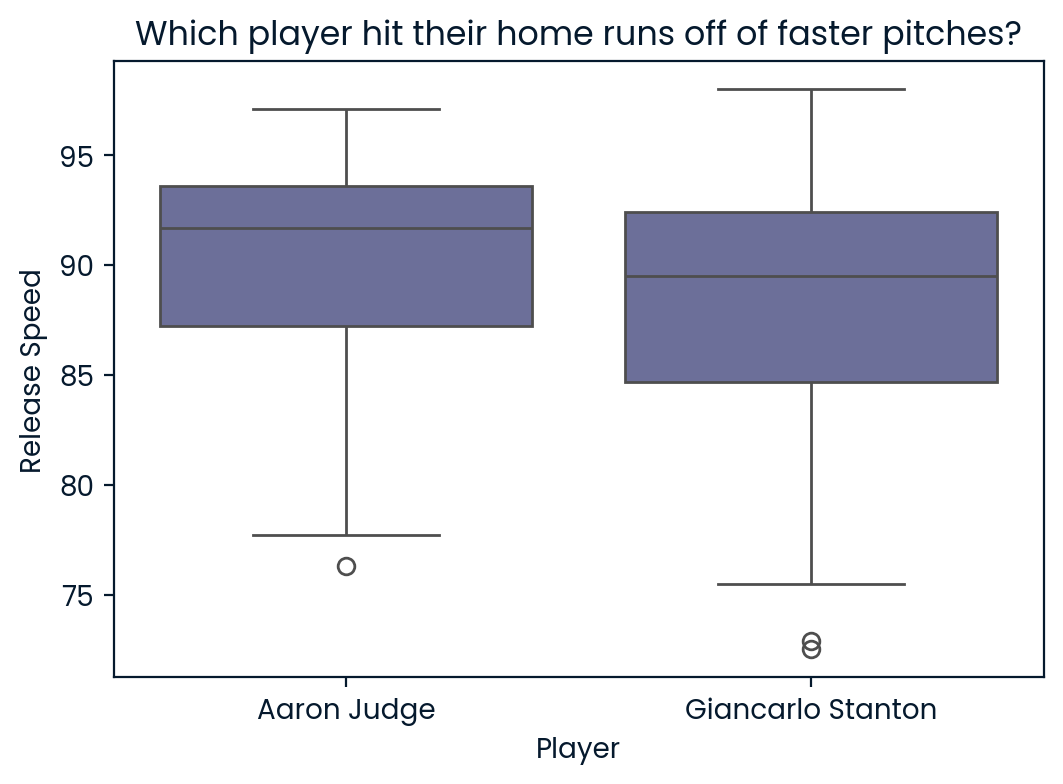

In [129]:
#Plotting and asnwer: Which player hit their home runs off of faster pitches (has the highest median)?

fig, ax = plt.subplots(figsize=(6,4))
sns.boxplot(
    data = df_all,
    x = 'player_name',
    y = 'release_speed',
    ax = ax
)

ax.set_title("Which player hit their home runs off of faster pitches?")
ax.set_xlabel('Player')
ax.set_ylabel('Release Speed')

plt.show()

In [130]:
player_fast = "Judge"

In [131]:
judge_strike_hr = df_all[(df_all['player_name']== 'Aaron Judge') & (df_all['zone']<=9)]
judge_strike_hr['zone_x'] = judge_strike_hr.apply(assign_x_coord, axis = 1)
judge_strike_hr['zone_y'] = judge_strike_hr.apply(assign_y_coord, axis = 1)

stanton_strike_hr = df_all[(df_all['player_name']== 'Giancarlo Stanton') & (df_all['zone']<=9)]
stanton_strike_hr['zone_x'] = stanton_strike_hr.apply(assign_x_coord, axis = 1)
stanton_strike_hr['zone_y'] = stanton_strike_hr.apply(assign_y_coord, axis = 1)

stanton_strike_hr

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number,zone_x,zone_y
56,SL,2017-09-28,89.5,2.0682,6.1177,Giancarlo Stanton,519317,571521,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (59) on a fly ball to...,R,R,L,MIA,ATL,X,NaN,fly_ball,0,0,2017,-0.130300,-0.210100,-0.1993,2.2053,NaN,NaN,543829.0,2,8,Bot,1.00,46.59,NaN,NaN,452095.0,NaN,170929_020346,-5.2404,-130.1155,-3.2799,-0.5507,22.3877,-34.1660,3.6318,1.6020,467.0,118.7,22.736,88.690,2173.0,5.433,492474,571521.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,55.0652,0.982,1.948,2.0,1.0,0.0,3.0,6.0,68,1,2,1
57,CU,2017-09-28,72.5,-1.9953,5.1623,Giancarlo Stanton,519317,527054,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,8.0,Giancarlo Stanton homers (58) on a fly ball to...,R,R,R,MIA,ATL,X,NaN,fly_ball,0,0,2017,1.263100,-0.395000,0.2128,2.1402,NaN,NaN,NaN,2,4,Bot,59.24,32.39,NaN,NaN,452095.0,NaN,170929_004604,2.2895,-105.2166,2.0929,8.5944,20.1215,-35.6884,3.6324,1.6027,422.0,109.2,30.584,70.953,2694.0,5.518,492474,527054.0,452095.0,518692.0,645277.0,611177.0,621020.0,572669.0,542255.0,455976.0,54.9802,0.968,1.927,2.0,1.0,0.0,3.0,6.0,36,1,2,1
58,CU,2017-09-23,76.1,-1.7136,6.5838,Giancarlo Stanton,519317,592836,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (57) on a line drive ...,R,R,R,ARI,MIA,X,NaN,line_drive,1,1,2017,0.914900,-0.741000,0.1186,2.1204,NaN,NaN,NaN,2,4,Top,50.52,37.41,NaN,NaN,NaN,NaN,170924_013612,2.2277,-110.7218,-1.0562,6.9849,18.8187,-38.1983,3.4921,1.4627,419.0,116.7,17.908,75.331,2263.0,5.623,492410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.8767,0.853,1.456,2.0,1.0,0.0,3.0,6.0,36,3,2,2
59,CU,2017-09-20,78.2,-1.3916,6.0983,Giancarlo Stanton,519317,592340,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,5.0,Giancarlo Stanton homers (56) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,1,2017,0.729100,-0.938000,0.1461,2.4083,NaN,NaN,543829.0,1,8,Bot,50.63,47.10,NaN,NaN,608700.0,NaN,170920_193537,1.9812,-113.5555,0.6901,5.7138,23.5274,-40.4715,3.6325,1.6027,399.0,116.7,17.422,76.915,2221.0,5.777,492373,592340.0,608700.0,642086.0,595943.0,452678.0,408314.0,607043.0,493114.0,607369.0,54.7213,0.822,1.347,2.0,1.0,0.0,3.0,6.0,68,3,2,2
60,SL,2017-09-18,89.5,-1.4171,5.7694,Giancarlo Stanton,519317,518774,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Giancarlo Stanton homers (55) on a line drive ...,R,R,R,MIA,NYM,X,NaN,line_drive,1,0,2017,0.405700,-0.022300,-0.3812,2.9884,NaN,543829.0,542513.0,0,4,Bot,100.92,6.98,NaN,NaN,518595.0,NaN,170919_004101,1.7093,-130.3502,-0.9286,4.3673,22.6890,-32.4514,3.6560,1.6770,455.0,114.2,17.321,90.126,2284.0,6.238,492346,518774.0,518595.0,642086.0,608325.0,452678.0,408314.0,607043.0,501571.0,493114.0,54.2601,0.881,1.331,2.0,1.0,0.0,3.0,6.0,39,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,FT,2015-04-29,84.0,-1.1343,6.5466,Giancarlo Stanton,519317,112526,home_r

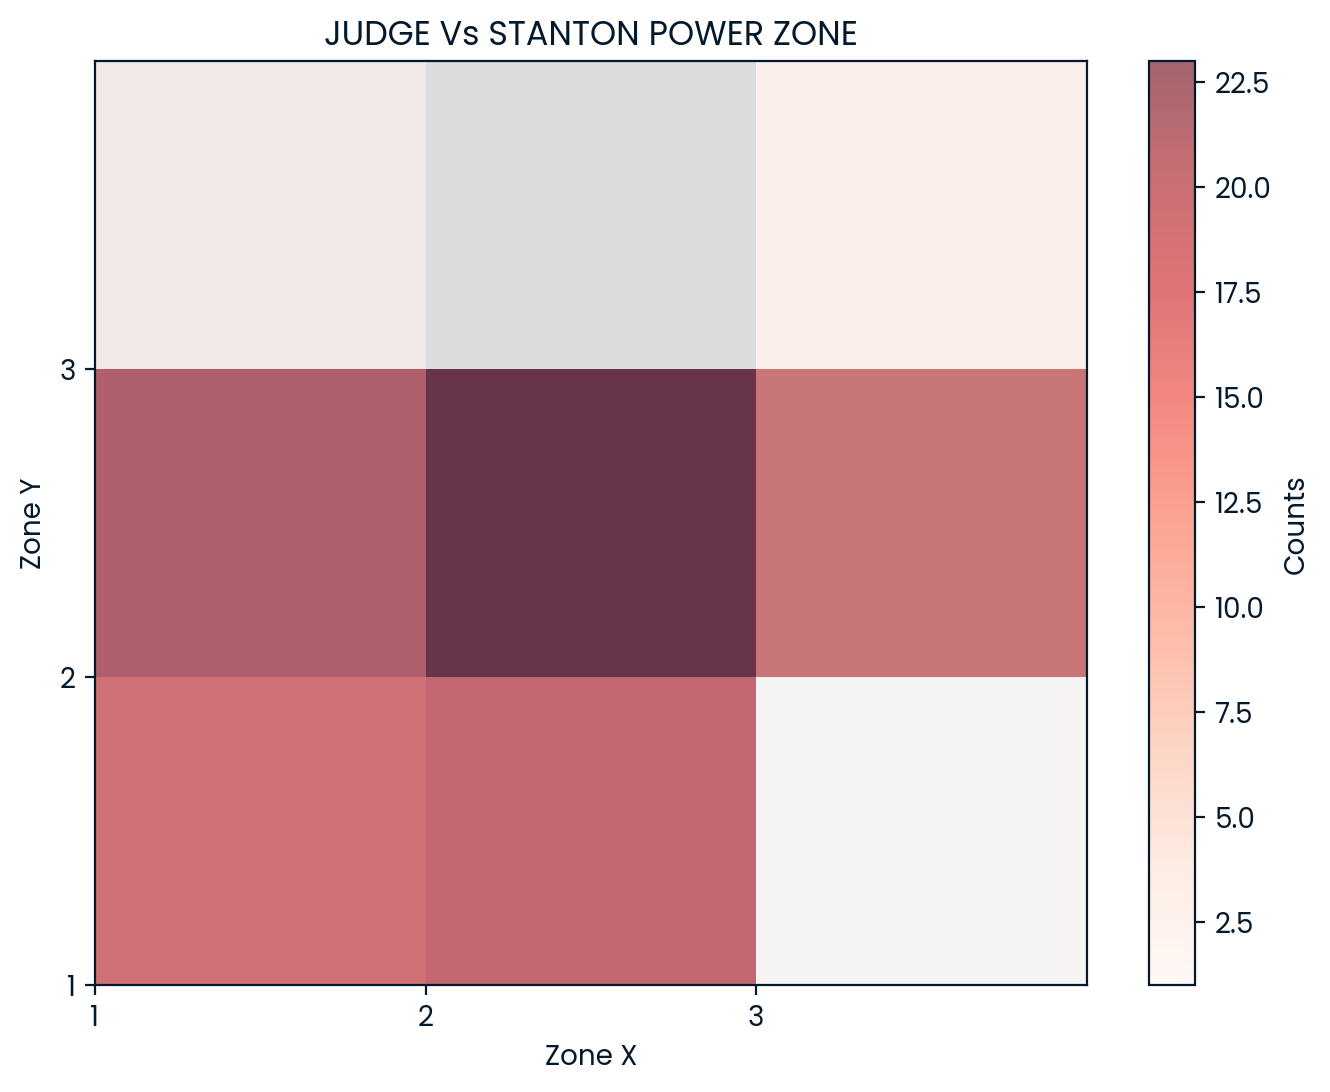

In [132]:
#Creating a 2D histogram for each player
plt.figure(figsize=(8,6))
plt.hist2d(
    judge_strike_hr['zone_x'], 
    judge_strike_hr['zone_y'],
    bins = [3,3],
    range = [[1,4],[1,4]],
    cmap = 'Blues',
    alpha = 0.6
)
plt.hist2d(
    stanton_strike_hr['zone_x'], 
    stanton_strike_hr['zone_y'],
    bins = [3,3],
    range = [[1,4],[1,4]],    
    cmap = 'Reds',
    alpha = 0.6
)
plt.xticks([1,2,3])
plt.yticks([1,2,3])
plt.colorbar(label = 'Counts')
plt.xlabel('Zone X')
plt.ylabel('Zone Y')
plt.title('JUDGE Vs STANTON POWER ZONE')
plt.show()